<a href="https://colab.research.google.com/github/HamidMandi/IMViS/blob/master/EEG_01_Omar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/gdrive/")

Mounted at /gdrive/


In [11]:
ls

drive/  sample_data/


In [3]:
! pip install mne

     |████████████████████████████████| 6.9 MB 4.2 MB/s 


In [51]:
import os
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import mne


In [37]:
raw_fname = "/content/drive/MyDrive/Colab Notebooks/MNE/eeg/Omar-Omar-05.02.2020.14.39.57.edf"
raw = mne.io.read_raw_edf(raw_fname, preload=True)

Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/MNE/eeg/Omar-Omar-05.02.2020.14.39.57.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4607  =      0.000 ...    35.992 secs...


In [38]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: COUNTER, INTERPOLATED, AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, ...
 chs: 39 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: 2020-02-05 14:39:57 UTC
 nchan: 39
 projs: []
 sfreq: 128.0 Hz
>

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


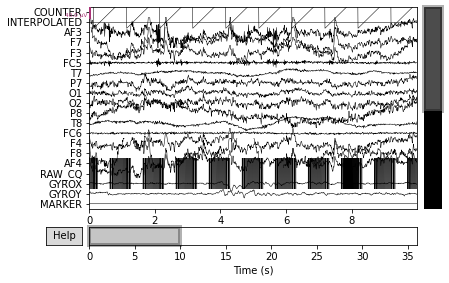

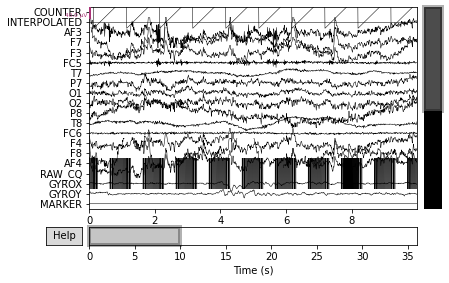

In [39]:
raw.plot()

Effective window size : 16.000 (s)


<ipython-input-10-a5fcf744740b>:1: UserWarning: Infinite value in PSD for channels INTERPOLATED, MARKER, SYNC, CQ_FC5, CQ_T8, CQ_FC6.
These channels might be dead.
  raw.plot_psd()
<ipython-input-10-a5fcf744740b>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


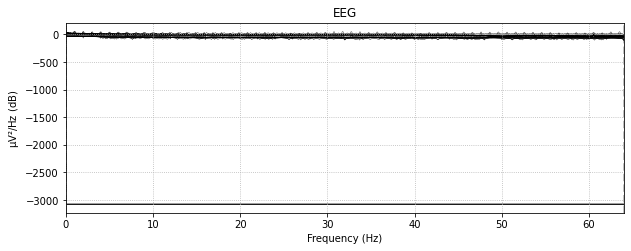

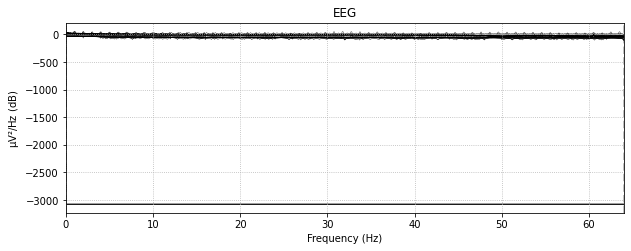

In [10]:
raw.plot_psd()

As we can see, there is some redundant information that must be wiped. So, some actions are needed

1. finding redundant channels `raw.info.ch_names` by [mne.info](https://mne.tools/stable/generated/mne.Info.html)

2. Droping data by  `drop.channels()`

3. Making standard montage based on experement `mne.channels.make_standard_montage`

In [42]:
print(raw.info.ch_names)

['COUNTER', 'INTERPOLATED', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'RAW_CQ', 'GYROX', 'GYROY', 'MARKER', 'SYNC', 'TIME_STAMP_s', 'TIME_STAMP_ms', 'CQ_AF3', 'CQ_F7', 'CQ_F3', 'CQ_FC5', 'CQ_T7', 'CQ_P7', 'CQ_O1', 'CQ_O2', 'CQ_P8', 'CQ_T8', 'CQ_FC6', 'CQ_F4', 'CQ_F8', 'CQ_AF4', 'CQ_CMS', 'CQ_DRL']


In [55]:
drop_chans = ['COUNTER', 'INTERPOLATED', 'RAW_CQ', 'GYROX', 'GYROY', 'MARKER', 
                 'SYNC', 'TIME_STAMP_s', 'TIME_STAMP_ms', 'CQ_AF3', 'CQ_F7', 'CQ_F3', 
                 'CQ_FC5', 'CQ_T7', 'CQ_P7', 'CQ_O1', 'CQ_O2', 'CQ_P8', 'CQ_T8', 
                 'CQ_FC6', 'CQ_F4', 'CQ_F8', 'CQ_AF4', 'CQ_CMS', 'CQ_DRL']

eeg = raw.copy().drop_channels(drop_chans)

In [56]:
eeg

<RawEDF | Omar-Omar-05.02.2020.14.39.57.edf, 14 x 4608 (36.0 s), ~523 kB, data loaded>

In [57]:
eeg.info.ch_names

['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4']

In [79]:
# Read and set the EEG electrode locations
montage = mne.channels.make_standard_montage('standard_1020')
eeg.set_montage(montage)
# these will be equivalent:
# montage = eeg.copy().set_montage(ten_twenty_montage)

eeg.set_eeg_reference(projection=True)  # needed for inverse modeling


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<RawEDF | Omar-Omar-05.02.2020.14.39.57.edf, 14 x 4608 (36.0 s), ~532 kB, data loaded>

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


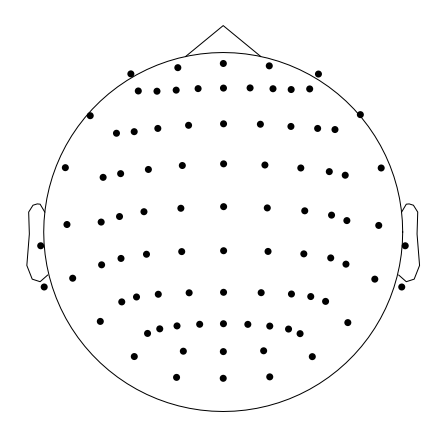

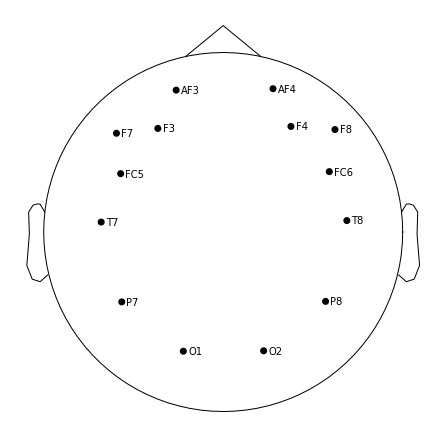

In [83]:
#Montage figure
# fig = montage.plot(kind='3d')
# fig.gca().view_init(azim=70, elev=15)
_ = montage.plot(kind='topomap', show_names=False)
_ = eeg.plot_sensors(show_names=True)



/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


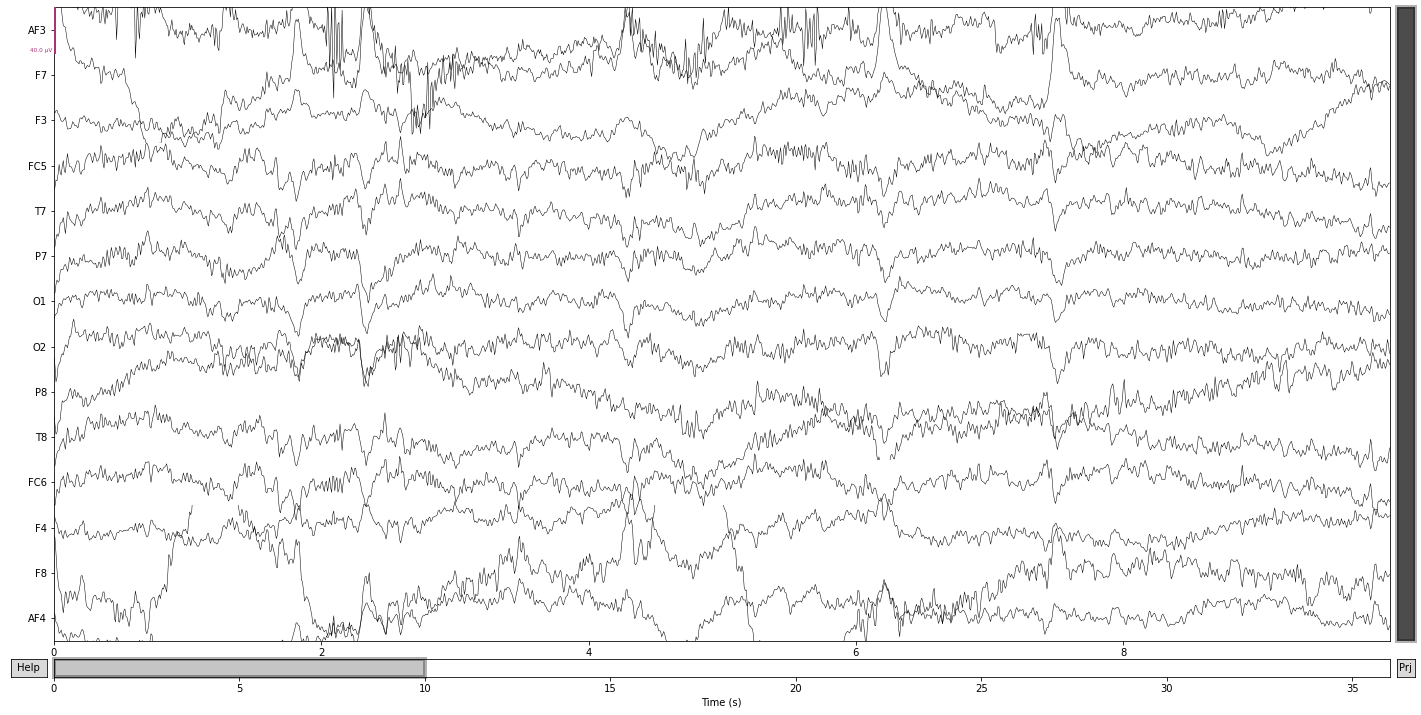

Effective window size : 16.000 (s)


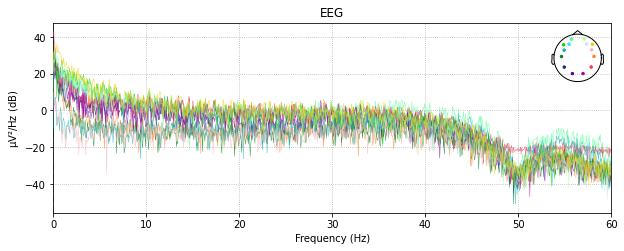

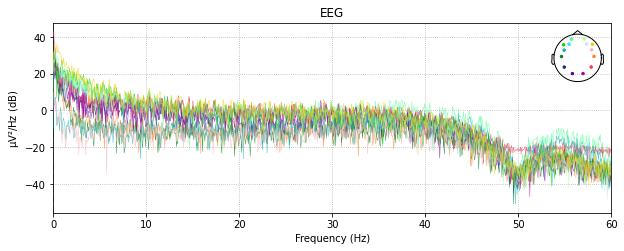

In [90]:
plt.rcParams["figure.figsize"]=20, 10
eeg.plot()
eeg.plot_psd(fmax=60)

# Preprocessing


In [117]:
#set up and fit ICA 
ica = mne.preprocessing.ICA(n_components=14, random_state=0, max_iter=800)
ica.fit(eeg.copy().filter(10, 60))


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 10 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 10.00
- Lower transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 8.75 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 4.00 Hz (-6 dB cutoff frequency: 62.00 Hz)
- Filter length: 169 samples (1.320 sec)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.


<ICA | raw data decomposition, fit (fastica): 4608 samples, 14 components, channels used: "eeg">

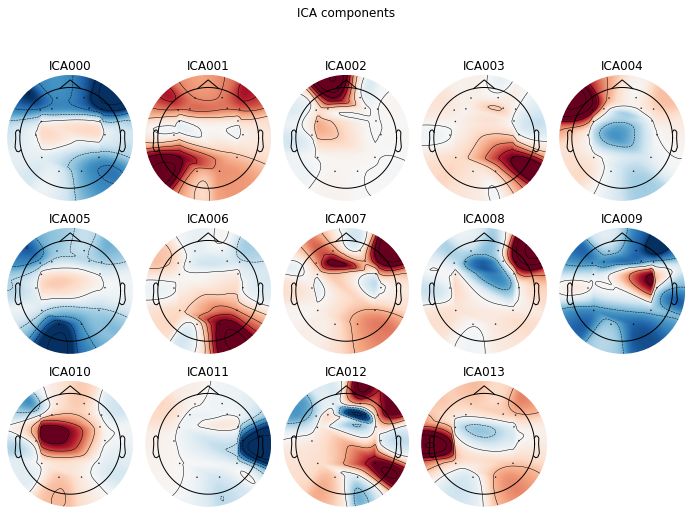

In [118]:
_ = ica.plot_components(outlines="skirt")

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


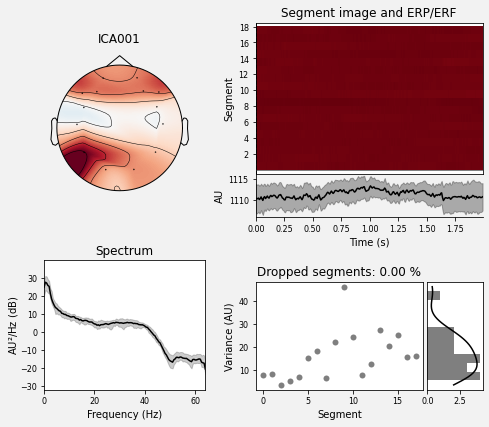

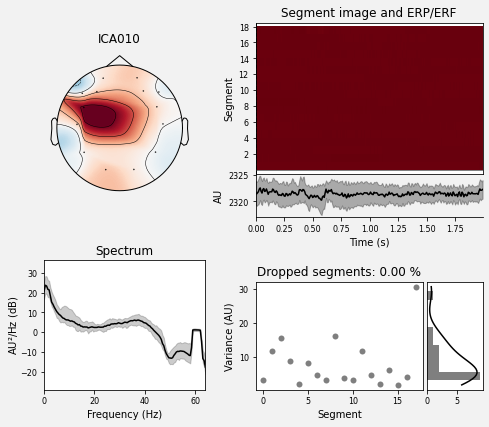

In [129]:
# Two methods for plotting ICA properties
_ = ica.plot_properties(eeg, [1,10]) #Plotting by ICA number

# pick_chns = ["P7", "O2"]               #Plotting by channel name
# ica.plot_properties(eeg, picks=pick_chns)

In [130]:
ica_exclude = [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13]


Plot EEG befor ICA 

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


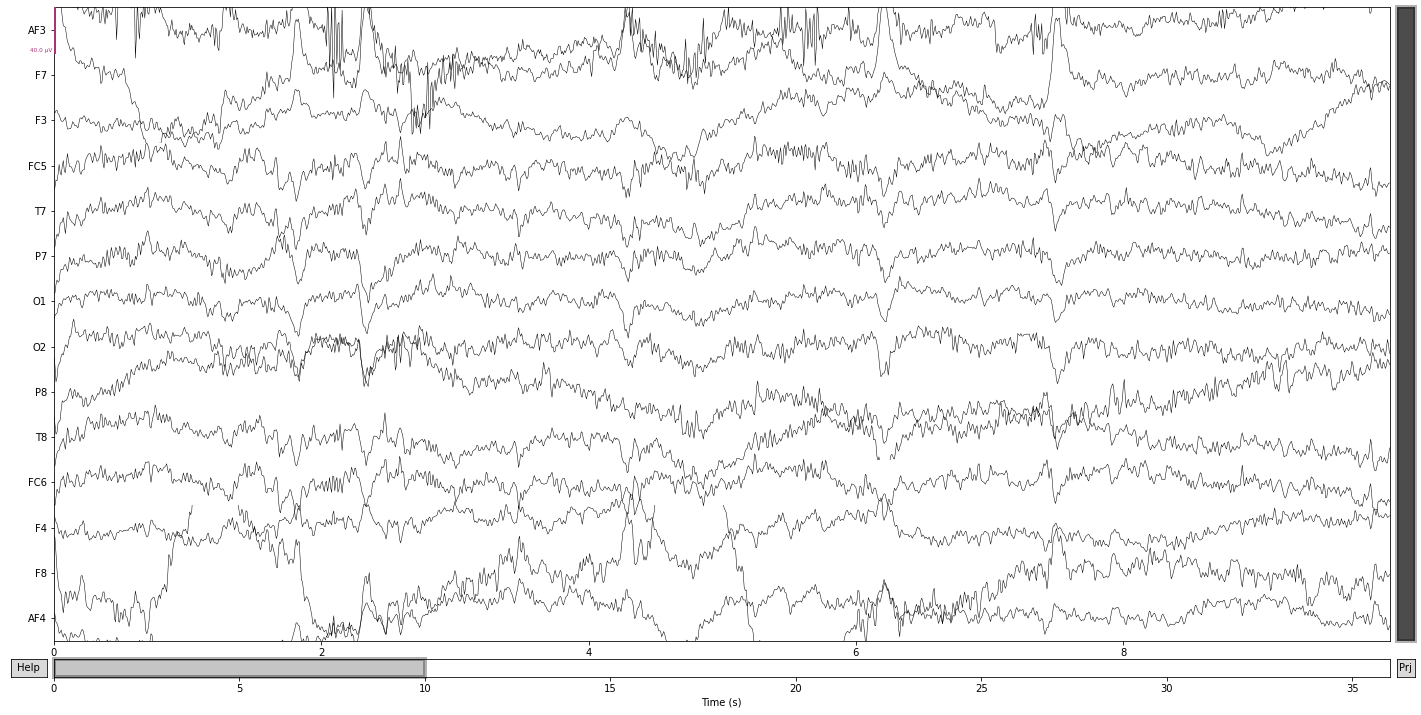

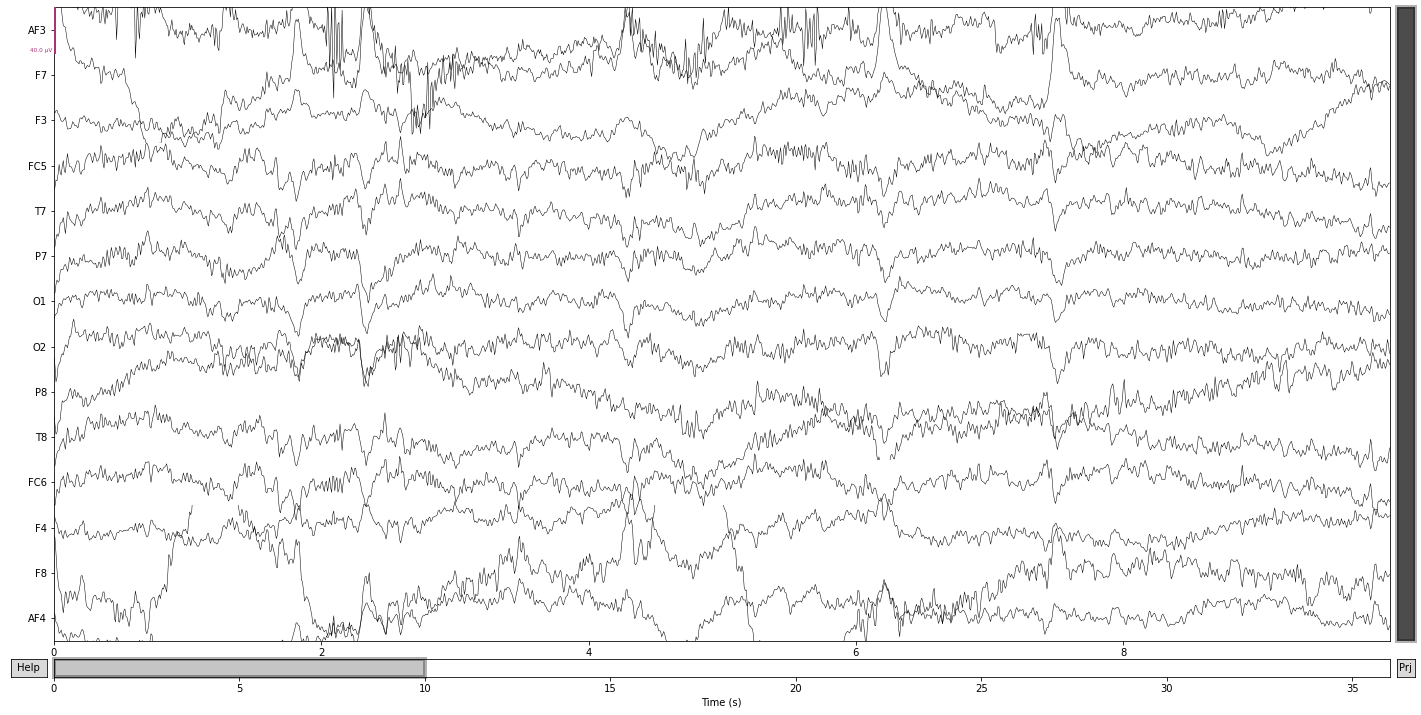

In [131]:
eeg.plot()

Plot EEG after ICA

Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 11 ICA components
    Projecting back using 14 PCA components


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


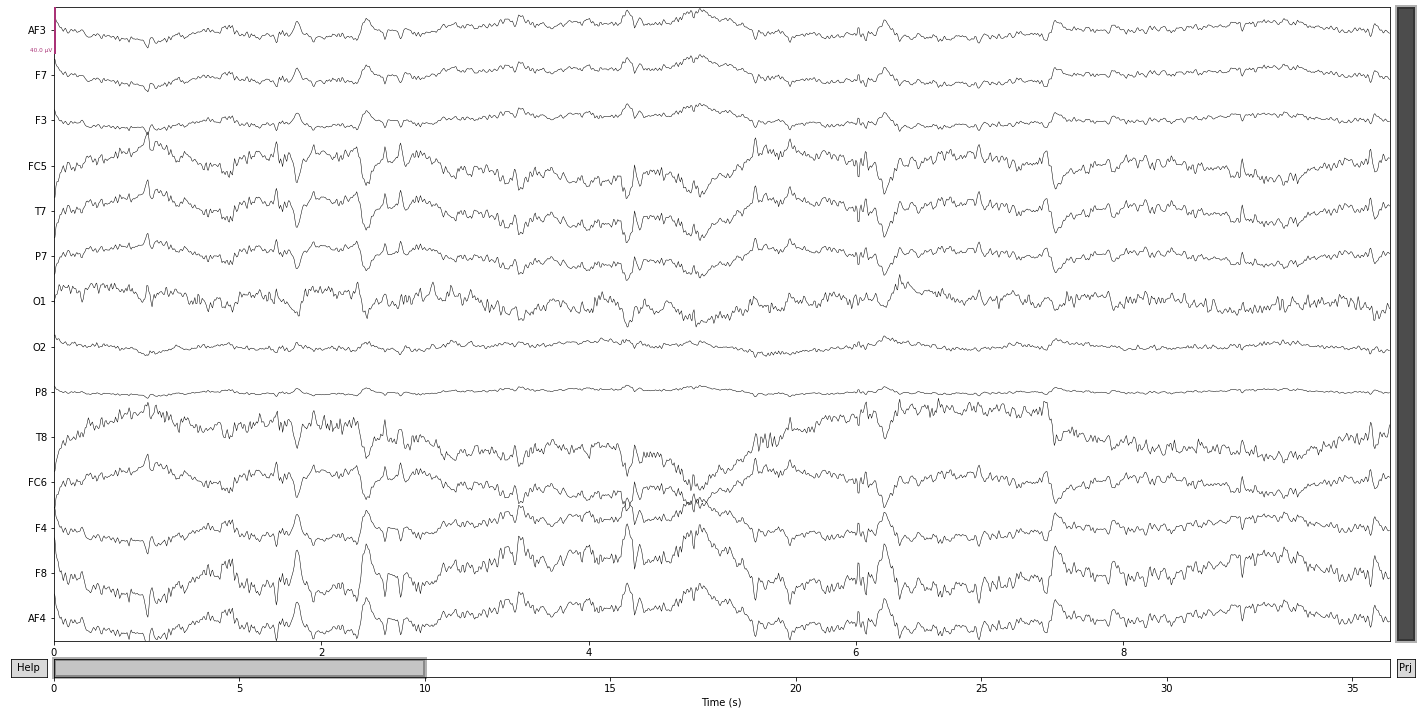

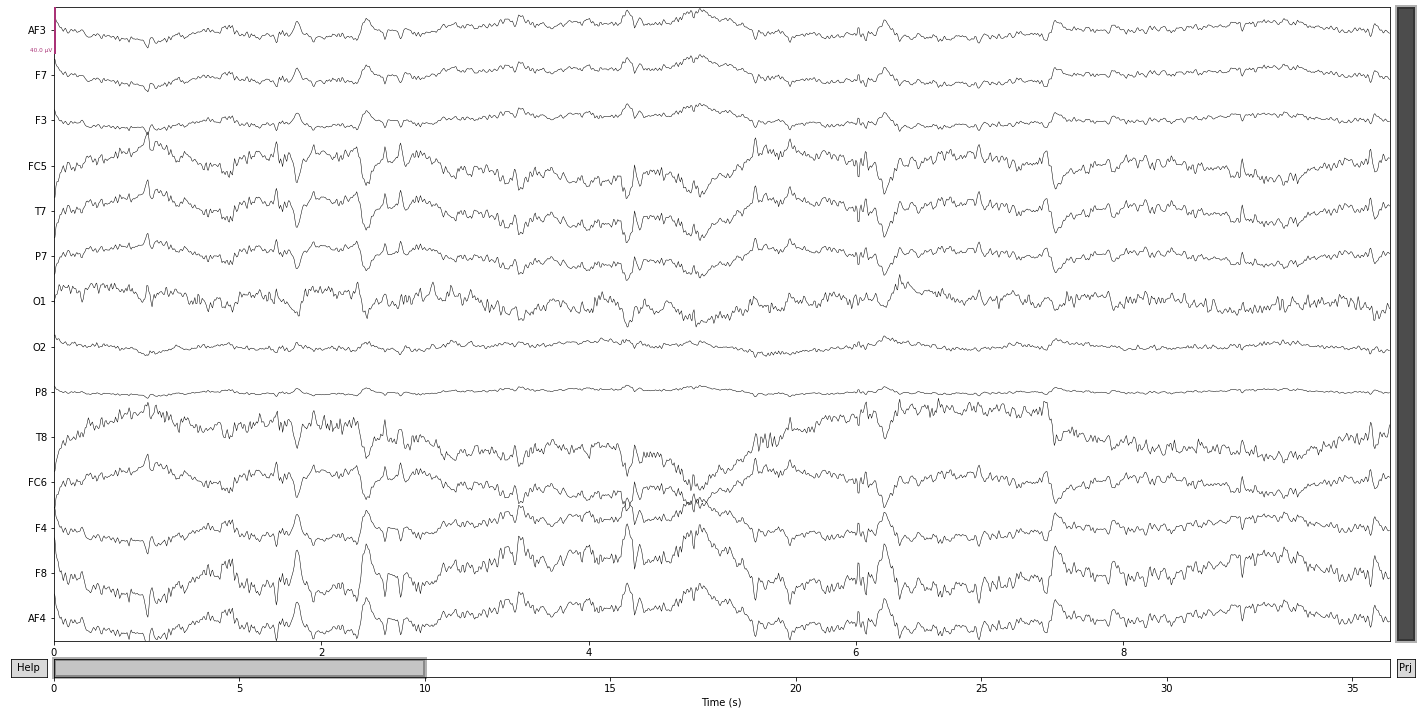

In [132]:
ica.apply(eeg, exclude=ica_exclude).plot()